### Project: ML for Humanitarian Cause

----
#### Exploring the Data
We'll start by importing the dataset and peeking into the imported data. 
Going forward in the document, the following terms and abbreviations will be used:
- HH - Household
- CT - Cash Transfer
- Wealth group

In [47]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
# Import supplementary visualization code visuals.py
import visuals as vs


# Pretty display for notebooks
%matplotlib inline

InteractiveShell.ast_node_interactivity = "all"

In [48]:
# Load the Census dataset
data = pd.read_csv("./data/output-refined-ann.csv")

#### Outputs

In [49]:
data.columns

Index(['RowID', 'Division_Name', 'Location_Name', 'Sublocation_Name', 'Village_Name', 'Wealthgroup_Name', 'PMT_Score', 'Resident_Provider', 'Polygamous', 'Kids_Under_15_In_Settlement', 'Children_Under_15_outside_settlement', 'Spouses_on_settlement', 'Spouses_Outside_HH', 'IsBeneficiaryHH', 'recipient_of_wfp', 'recipient_of_hsnp', 'OPCT_received', 'PWSDCT_received', 'Relationship_MainProvider', 'Gender', 'Age', 'School_meal_receive', 'Work_last_7days', 'Main_provider_occupation', 'Toilet', 'Drinking_water', 'Donkeys_owned', 'Camels_owned', 'Zebu_cattle_owned', 'Shoats_owned', 'Nets_owned', 'Hooks_owned', 'Boats_rafts_owned'], dtype='object')

In [50]:
data.head()

,RowID,Division_Name,Location_Name,Sublocation_Name,Village_Name,Wealthgroup_Name,PMT_Score,Resident_Provider,Polygamous,Kids_Under_15_In_Settlement,Children_Under_15_outside_settlement,Spouses_on_settlement,Spouses_Outside_HH,IsBeneficiaryHH,recipient_of_wfp,recipient_of_hsnp,OPCT_received,PWSDCT_received,Relationship_MainProvider,Gender,Age,School_meal_receive,Work_last_7days,Main_provider_occupation,Toilet,Drinking_water,Donkeys_owned,Camels_owned,Zebu_cattle_owned,Shoats_owned,Nets_owned,Hooks_owned,Boats_rafts_owned
0,1,KAALING,KAIKOR,LOKOLIO,AKILODET,Very Poor,414.7927,3.0,1.0,0.0,0.0,0.0,0.0,False,0,0,0,0,Main Provider,Female,34,0,Doing nothing,Main provider occupation not defined,Bush-None,Tube well/borehole with pump,0,0,0,0,0,0,0
1,2,KAALING,KAIKOR,LOKOLIO,AKILODET,Very Poor,392.9025,4.0,0.0,0.0,0.0,0.0,0.0,False,0,0,0,0,Main Provider,Female,41,0,Doing nothing,"Shop assistants, food vendors, sales & service...",Uncovered pit latrine,Tube well/borehole with pump,0,0,0,0,0,0,0
2,3,KAALING,KAIKOR,LOKOLIO,AKILODET,Middle,389.8378,4.0,0.0,0.0,0.0,0.0,0.0,False,1,1,0,0,Main Provider,Female,56,0,Doing nothing,"Herding Livestock, poultry, dairy and livestoc...",Bush-None,Tube well/borehole with pump,1,0,0,55,0,0,0
3,4,KAALING,KAIKOR,LOKOLIO,AKILODET,Very Poor,389.5320,3.0,1.0,0.0,0.0,0.0,0.0,False,0,0,0,0,Main Provider,Female,41,0,Homemaker,Street vendors and related,Bush-None,Public tap,0,0,0,0,0,0,0
4,5,KAALING,KAIKOR,LOKOLIO,AKILODET,Very Poor,184.6187,4.0,0.0,0.0,0.0,0.0,0.0,True,0,1,0,0,Main Provider,Female,23,0,Other,"Burn/sell charcoal, subsis. agric. (small-scal...",Bush-None,Unprotected dug well/springs,1,0,0,18,0,0,0


In [51]:
data.dtypes

RowID                                     int64
Division_Name                            object
Location_Name                            object
Sublocation_Name                         object
Village_Name                             object
Wealthgroup_Name                         object
PMT_Score                               float64
Resident_Provider                       float64
Polygamous                              float64
Kids_Under_15_In_Settlement             float64
Children_Under_15_outside_settlement    float64
Spouses_on_settlement                   float64
Spouses_Outside_HH                      float64
IsBeneficiaryHH                            bool
recipient_of_wfp                          int64
recipient_of_hsnp                         int64
OPCT_received                             int64
PWSDCT_received                           int64
Relationship_MainProvider                object
Gender                                   object
Age                                     

In [52]:
data.shape

(44606, 33)

### Data Exploration
A cursory investigation of the dataset will determine how many HH fit into either group, This will give us an indication percentage of HH in group 1 versus HH in group 2, we will be computing the following:
- The total number of records, `'n_records'`
- Wealth rankings

In [53]:
# TODO: Total number of records
n_records = len(data["IsBeneficiaryHH"])

w_b = len(np.where(data["Wealthgroup_Name"] == 'Better Off')[0])
w_m = len(np.where(data["Wealthgroup_Name"] == 'Middle')[0])
w_p = len(np.where(data["Wealthgroup_Name"] == 'Poor')[0])
w_vp = len(np.where(data["Wealthgroup_Name"] == 'Very Poor')[0])

# Print the results

print("Total number of records: {}".format(n_records))
print(f'Better Off: {w_b}\nMiddle: {w_m}\nPoor: {w_p}\nVery Poor: {w_vp}')

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

Total number of records: 44606
Better Off: 2198
Middle: 5699
Poor: 12954
Very Poor: 23755


#### Wealth ranking

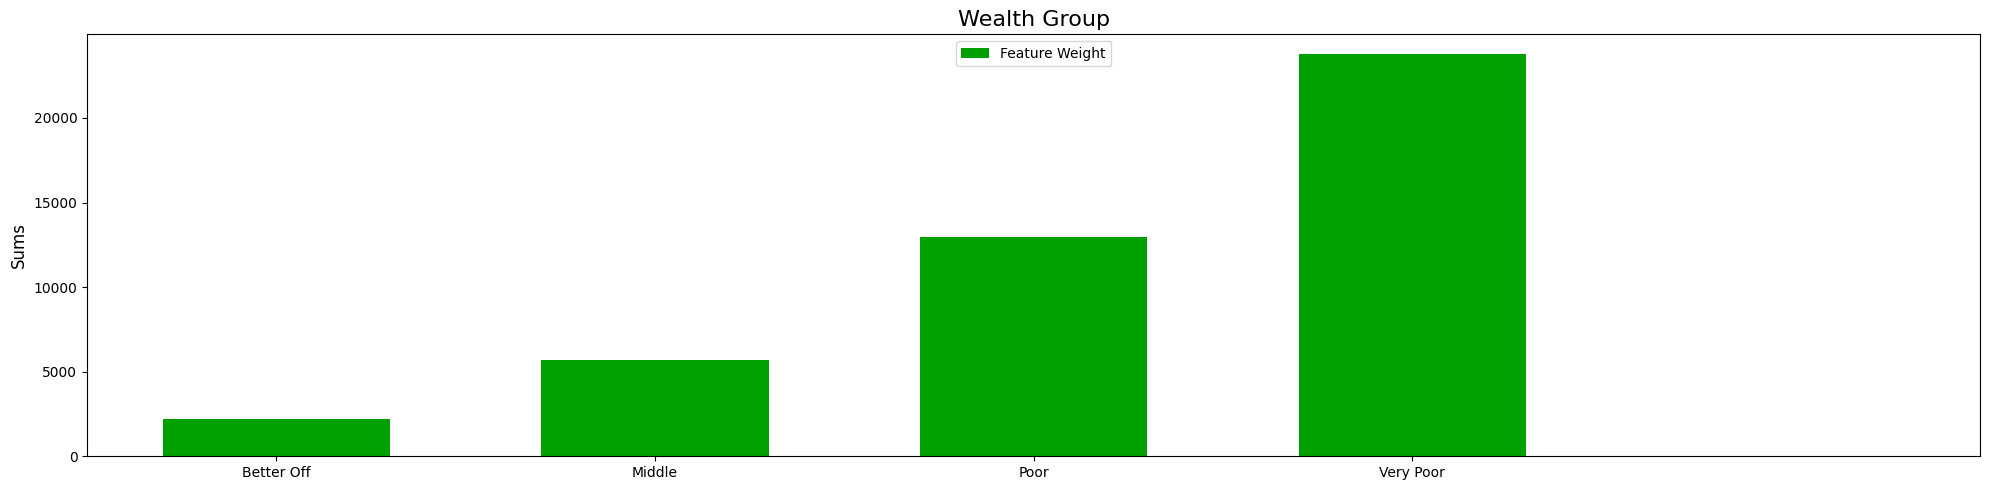

In [54]:
vs.wealthgroup(data)

### Preparing Data

In [55]:
data['Wealthgroup_Name'] = data['Wealthgroup_Name'].replace(['Better Off', 'Middle', 'Poor', 'Very Poor'], [0,1,2,3])

C:\Users\david.njuguna\AppData\Local\Temp\ipykernel_32420\561750843.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Wealthgroup_Name'] = data['Wealthgroup_Name'].replace(['Better Off', 'Middle', 'Poor', 'Very Poor'], [0,1,2,3])


#### Dataset Balancing (Undersampling)

In [ ]:
ds_Balanced = True

if ds_Balanced:
    w1_data = data[data["Wealthgroup_Name"] == 0]
    w2_data = data[data["Wealthgroup_Name"] == 1]
    w3_data = data[data["Wealthgroup_Name"] == 2]
    w4_data = data[data["Wealthgroup_Name"] == 3]
    selection_number = 2000


    d1 = w1_data[:selection_number]
    d2 = w2_data[:selection_number]
    d3 = w3_data[:selection_number]
    d4 = w4_data[:selection_number]

    data = pd.concat([d1, d2, d3, d4])


    print(f"{len(d1)}, {len(d2)}, {len(d3)}, {len(d4)}, {len(data)}")
    print('shape: ', data.shape)


#### Converting Bools

In [57]:
bool_cols = [
    "recipient_of_wfp",
    "OPCT_received",
    "PWSDCT_received",
    "School_meal_receive",
]

data[bool_cols] = data[bool_cols].applymap(lambda x: x == 1)

C:\Users\david.njuguna\AppData\Local\Temp\ipykernel_32420\1515787377.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[bool_cols] = data[bool_cols].applymap(lambda x: x == 1)


#### Dropping Features

In [58]:
# drop target label and features with non-trivial missing data
# fd = data.drop(['Resident_Provider'], axis=1)
fd = data
fd["Resident_Provider"] = fd["Resident_Provider"].astype(str)

# convert skip to NaN
fd2 = fd.replace("SKIP", np.nan).replace("", np.nan)

# convert variables to SKIP
# fd2['Chronic_illness'].replace(2, np.nan)
# fd2['Polygamous'].replace(-2, np.nan)

fd2.dropna(inplace=True)

# display(fd2.isnull().any())

target = fd2["Wealthgroup_Name"] #fd2["IsBeneficiaryHH"] #fd2["Wealthgroup_Name"]

fd2 = fd2.drop(
    [
        "IsBeneficiaryHH",
        "RowID",
        "Sublocation_Name",
        "Village_Name",
        "Division_Name",
        "Location_Name",
    ],
    axis=1,
)
fd2 = fd2.drop("Wealthgroup_Name", axis=1)
fd2 = fd2.drop("PMT_Score", axis=1)


# display(fd2.head())

print("Total records after 1st stage of preprocessing: {}".format(len(fd2)))

Total records after 1st stage of preprocessing: 41245


#### Normalization

In [59]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()  # default=(0, 1)
numerical = [
    "Age",
    "Polygamous",
    "Children_Under_15_outside_settlement",
    "Kids_Under_15_In_Settlement",
    "Spouses_on_settlement",
    "Spouses_Outside_HH",
    "Donkeys_owned",
    "Camels_owned",
    "Zebu_cattle_owned",
    "Shoats_owned",
    "Nets_owned",
    "Hooks_owned",
    "Boats_rafts_owned",
    # 'PMT_Score',
]

features_minmax_transform = pd.DataFrame(data=fd2)
# display(features_log_minmax_transform[:1])
features_minmax_transform[numerical] = scaler.fit_transform(fd2[numerical])

# print(features_minmax_transform.skew())


# Show an example of a record with scaling applied
display(features_minmax_transform.head(100))

,Resident_Provider,Polygamous,Kids_Under_15_In_Settlement,Children_Under_15_outside_settlement,Spouses_on_settlement,Spouses_Outside_HH,recipient_of_wfp,recipient_of_hsnp,OPCT_received,PWSDCT_received,Relationship_MainProvider,Gender,Age,School_meal_receive,Work_last_7days,Main_provider_occupation,Toilet,Drinking_water,Donkeys_owned,Camels_owned,Zebu_cattle_owned,Shoats_owned,Nets_owned,Hooks_owned,Boats_rafts_owned
0,3.0,1.0,0.0,0.0,0.0,0.0,False,0,False,False,Main Provider,Female,0.262626,False,Doing nothing,Main provider occupation not defined,Bush-None,Tube well/borehole with pump,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,False,0,False,False,Main Provider,Female,0.333333,False,Doing nothing,"Shop assistants, food vendors, sales & service...",Uncovered pit latrine,Tube well/borehole with pump,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,True,1,False,False,Main Provider,Female,0.484848,False,Doing nothing,"Herding Livestock, poultry, dairy and livestoc...",Bush-None,Tube well/borehole with pump,0.003333,0.0,0.0,0.101289,0.0,0.0,0.0
3,3.0,1.0,0.0,0.0,0.0,0.0,False,0,False,False,Main Provider,Female,0.333333,False,Homemaker,Street vendors and related,Bush-None,Public tap,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,False,1,False,False,Main Provider,Female,0.151515,False,Other,"Burn/sell charcoal, subsis. agric. (small-scal...",Bush-None,Unprotected dug well/springs,0.003333,0.0,0.0,0.033149,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.0,0.0,0.0,0.0,0.0,0.0,False,0,False,False,Main Provider,Female,0.161616,False,Doing nothing,"Food, Brewers, catering, baking, butchers, fis...",Bush-None,Unprotected dug well/springs,0.000000,0.0,0.0,0.009208,0.0,0.0,0.0
96,4.0,0.0,0.0,0.0,0.0,0.0,False,0,False,False,Main Provider,Male,0.151515,False,Doing nothing,Main provider occupation not defined,Bush-None,Unprotected dug well/springs,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
97,4.0,0.0,0.0,0.0,0.0,0.0,False,0,False,False,Main Provider,Male,0.303030,False,Herding-Worked on own/family agri. holding,"Herding Livestock, poultry, dairy and livestoc...",Bush-None,Unprotected dug well/springs,0.000000,0.0,0.0,0.092081,0.0,0.0,0.0
98,4.0,0.0,0.0,0.0,0.0,0.0,False,0,False,False,Main Provider,Female,0.151515,False,Other,"Food, Brewers, catering, baking, butchers, fis...",Bush-None,Unprotected dug well/springs,0.000000,0.0,0.0,0.005525,0.0,0.0,0.0


#### One-hot encoding

In [60]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
# print features_log_minmax_transform[:1]
# target = target.replace([False, True], [0, 1])

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
# print (encoded)
# display(features_final.head())

86 total features after one-hot encoding.


In [61]:
zipped = zip(features_final.columns.to_list(), features_final.dtypes.to_list())

list(zipped)

[('Polygamous', dtype('float64')),
 ('Kids_Under_15_In_Settlement', dtype('float64')),
 ('Children_Under_15_outside_settlement', dtype('float64')),
 ('Spouses_on_settlement', dtype('float64')),
 ('Spouses_Outside_HH', dtype('float64')),
 ('recipient_of_wfp', dtype('bool')),
 ('recipient_of_hsnp', dtype('int64')),
 ('OPCT_received', dtype('bool')),
 ('PWSDCT_received', dtype('bool')),
 ('Age', dtype('float64')),
 ('School_meal_receive', dtype('bool')),
 ('Donkeys_owned', dtype('float64')),
 ('Camels_owned', dtype('float64')),
 ('Zebu_cattle_owned', dtype('float64')),
 ('Shoats_owned', dtype('float64')),
 ('Nets_owned', dtype('float64')),
 ('Hooks_owned', dtype('float64')),
 ('Boats_rafts_owned', dtype('float64')),
 ('Resident_Provider_0.0', dtype('bool')),
 ('Resident_Provider_1.0', dtype('bool')),
 ('Resident_Provider_2.0', dtype('bool')),
 ('Resident_Provider_3.0', dtype('bool')),
 ('Resident_Provider_4.0', dtype('bool')),
 ('Resident_Provider_5.0', dtype('bool')),
 ('Resident_Provide

In [62]:
bool_cols = features_final.select_dtypes(include=['bool']).columns
features_final[bool_cols] = features_final[bool_cols].replace([False, True], [0, 1])

bool_cols

C:\Users\david.njuguna\AppData\Local\Temp\ipykernel_32420\1897300389.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features_final[bool_cols] = features_final[bool_cols].replace([False, True], [0, 1])


Index(['recipient_of_wfp', 'OPCT_received', 'PWSDCT_received', 'School_meal_receive', 'Resident_Provider_0.0', 'Resident_Provider_1.0', 'Resident_Provider_2.0', 'Resident_Provider_3.0', 'Resident_Provider_4.0', 'Resident_Provider_5.0', 'Resident_Provider_6.0', 'Relationship_MainProvider_Daughter', 'Relationship_MainProvider_Father/Mother', 'Relationship_MainProvider_Foster Child', 'Relationship_MainProvider_Grandchild', 'Relationship_MainProvider_Main Provider', 'Relationship_MainProvider_Other Non-Relative', 'Relationship_MainProvider_Other Relative', 'Relationship_MainProvider_Sister/Brother', 'Relationship_MainProvider_Son', 'Relationship_MainProvider_Spouse', 'Gender_Female', 'Gender_Male', 'Work_last_7days_Doing nothing', 'Work_last_7days_Full-time student', 'Work_last_7days_Herding-Worked on own/family agri. holding', 'Work_last_7days_Homemaker', 'Work_last_7days_In capacitated', 'Work_last_7days_On leave', 'Work_last_7days_Other', 'Work_last_7days_Retired',
       'Work_last_7da

In [63]:
features_final.to_csv('data/features_final.csv')
features_final

,Polygamous,Kids_Under_15_In_Settlement,Children_Under_15_outside_settlement,Spouses_on_settlement,Spouses_Outside_HH,recipient_of_wfp,recipient_of_hsnp,OPCT_received,PWSDCT_received,Age,School_meal_receive,Donkeys_owned,Camels_owned,Zebu_cattle_owned,Shoats_owned,Nets_owned,Hooks_owned,Boats_rafts_owned,Resident_Provider_0.0,Resident_Provider_1.0,Resident_Provider_2.0,Resident_Provider_3.0,Resident_Provider_4.0,Resident_Provider_5.0,Resident_Provider_6.0,Relationship_MainProvider_Daughter,Relationship_MainProvider_Father/Mother,Relationship_MainProvider_Foster Child,Relationship_MainProvider_Grandchild,Relationship_MainProvider_Main Provider,Relationship_MainProvider_Other Non-Relative,Relationship_MainProvider_Other Relative,Relationship_MainProvider_Sister/Brother,Relationship_MainProvider_Son,Relationship_MainProvider_Spouse,Gender_Female,Gender_Male,Work_last_7days_Doing nothing,Work_last_7days_Full-time student,Work_last_7days_Herding-Worked on own/family agri. holding,Work_last_7days_Homemaker,Work_last_7days_In capacitated,Work_last_7days_On leave,Work_last_7days_Other,Work_last_7days_Retired,Work_last_7days_Seeking work,Work_last_7days_Sick leave,Work_last_7days_Worked for pay,Work_last_7days_Worked on own/family business,"Main_provider_occupation_Armed Forces, police or customs","Main_provider_occupation_Burn/sell charcoal, subsis. agric. (small-scale crop/ livestock) fisheries, forest work, agric. labour ( construc. polls, thatch grass)","Main_provider_occupation_Casual unskilled labour, caretakers, messengers, watchman, housekeepers & domestic workers","Main_provider_occupation_Construction, maintenance, mining",Main_provider_occupation_Crop and animal producers (mixed farming- relatively large-scale),"Main_provider_occupation_Drivers, transport, freight workers","Main_provider_occupation_Field crop, vegetable or horticultural ( arable -no livestock)","Main_provider_occupation_Food, Brewers, catering, baking, butchers, fishmonger, dairy products","Main_provider_occupation_Govt. administrators, local authority officials, NGO staff & other administrators and managers",Main_provider_occupation_Handicraft workers,"Main_provider_occupation_Herding Livestock, poultry, dairy and livestock producers (livestock only)",Main_provider_occupation_Main provider occupation not defined,"Main_provider_occupation_Medical-clinical, associate medical, nursing, health professionals, midwifes or auxiliary nurses",Main_provider_occupation_Other jobs,"Main_provider_occupation_Other sales, services or manufacturing","Main_provider_occupation_Primary teachers, secondary, technical Institute teachers or other teaching professionals","Main_provider_occupation_Shop assistants, food vendors, sales & services, cashiers, bartenders",Main_provider_occupation_Street vendors and related,Toilet_Bucket/pan,Toilet_Bush-None,Toilet_Covered pit latrine,Toilet_Flush toilet,Toilet_Other,Toilet_Uncovered pit latrine,Toilet_VIP latrine,Drinking_water_Bottled water,Drinking_water_Other,Drinking_water_Piped water inside dwelling,Drinking_water_Piped water into plot/yard,Drinking_water_Protected dug well,Drinking_water_Protected spring,Drinking_water_Public tap,Drinking_water_Rainwater collection,"Drinking_water_River, Lake, ponds or similar",Drinking_water_Tube well/borehole with pump,Drinking_water_Unprotected dug well/springs,Drinking_water_Water truck/vendor
0,1.0,0.000000,0.000000,0.0,0.0,0,0,0,0,0.262626,0,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.000000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,0.333333,0,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.000000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.0,0.000000,0.000000,0.0,0.0,1,1,0,0,0.484848,0,0.003333,0.000000,0.00,0.101289,0.0,0.00,0.000000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1

#### Shuffling and splitting data

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features_final, target, test_size=0.2, random_state=0
)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape))
print("Testing set has {} samples.".format(X_test.shape))

Training set has (32996, 86) samples.
Testing set has (8249, 86) samples.


In [65]:
wg_name = ['Better Off', 'Middle', 'Poor', 'Very Poor']
wg_idx = [0,1,2,3]

for i in wg_idx:
    print(wg_name[i], f'[{i}] training set count -> ', y_train[y_train == i].count(),)
    print(wg_name[i], f'[{i}] test set count -> ', y_test[y_test == i].count(),)
    print('')

Better Off [0] training set count ->  1477
Better Off [0] test set count ->  356

Middle [1] training set count ->  4082
Middle [1] test set count ->  1007

Poor [2] training set count ->  9623
Poor [2] test set count ->  2339

Very Poor [3] training set count ->  17814
Very Poor [3] test set count ->  4547



In [159]:
X_train.to_csv('data/X_train.csv')

### Model Building

In [160]:
import mlflow

MLFLOW_TRACKING_URI = "http://127.0.0.1:5000"
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

##### XGBoost

Balanced Dataset?  False


<Experiment: artifact_location='mlflow-artifacts:/254847489140008771', creation_time=1753286582012, experiment_id='254847489140008771', last_update_time=1753286582012, lifecycle_stage='active', name='xgboost-capstone', tags={}>

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted labels')

Text(70.72222222222221, 0.5, 'Actual labels')

Text(0.5, 1.0, 'XGBoost Confusion Matrix')

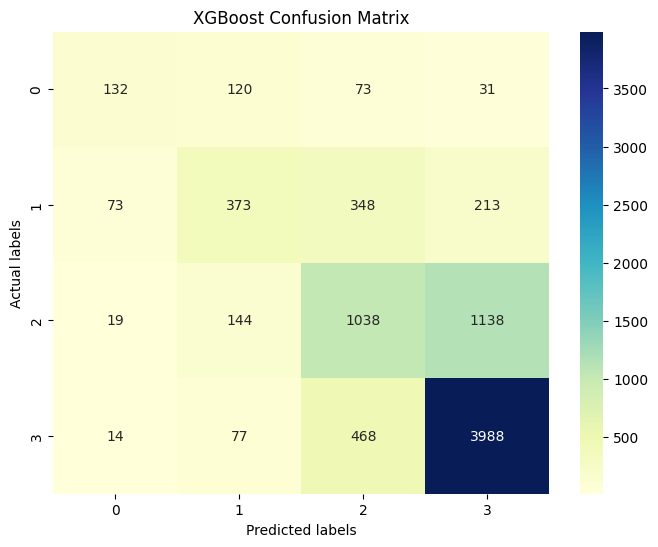

🏃 View run gregarious-steed-254 at: http://127.0.0.1:5000/#/experiments/254847489140008771/runs/afbc600909d0426c9242a773f3caa553
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/254847489140008771
Accuracy: 0.6705055158200994
Precision: 0.5895840659787615
Recall: 0.5155087146738935
F1-score: 0.5422068454191473
Log Loss: 0.7925387173462348


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
import seaborn as sns

print("Balanced Dataset? ", ds_Balanced)

mlflow.set_experiment("xgboost-capstone")

clf = XGBClassifier()
clf.fit(X_train, y_train)

# make predictions, calculate performance metrics
y_pred_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

# CM Evaluation
cm = confusion_matrix(y_test, y_pred)
# print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.title("XGBoost Confusion Matrix")
plt.savefig('xgb_cm_plot.png')
plt.show()

# Other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
log_loss_value = log_loss(y_test, y_pred_proba)

with mlflow.start_run():
    mlflow.set_tag("model", clf.__class__.__name__)
    mlflow.set_tag("dataset", "imbalanced" if not ds_Balanced else 'balanced')
    mlflow.log_params(clf.get_params())
    mlflow.log_metrics({"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "log_loss": log_loss_value})
    # mlflow.log_figure(plt.gcf(), "xgboost_cm_plot.png")
    mlflow.log_artifact('xgb_cm_plot.png')
    mlflow.xgboost.log_model(clf, "xgb_model")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Log Loss:", log_loss_value)

In [84]:
print(
    X_train.shape, y_train.shape,
    X_test.shape, y_test.shape
)

(32996, 86) (32996,) (8249, 86) (8249,)


##### Model Registry

In [ ]:
from mlflow.tracking import MlflowClient
from mlflow.entities import ViewType

client = MlflowClient(tracking_uri=MLFLOW_TRACKING_URI)

# XGBoost
runs = client.search_runs(
    experiment_ids='254847489140008771',
    filter_string="metrics.rmse < 7",
    run_view_type=ViewType.ACTIVE_ONLY,
    max_results=5,
    order_by=["metrics.rmse ASC"]
)

for run in runs:
    print("Run ID: {}, RMSE: {}".format(run.info.run_id, run.data.metrics['rmse']))

In [ ]:
model_name = "asal_xgb_model"

run_id = "b8904012c84343b5bf8ee72aa8f0f402"
model_uri = f"runs:/{run_id}/model"
mlflow.register_model(model_uri=model_uri, name="asal_xgb_model")



In [ ]:
latest_versions = client.get_latest_versions(name=model_name)

for version in latest_versions:
    print(f"version: {version.version}, stage: {version.current_stage}")

In [ ]:
model_version = 4
new_stage = "Staging"
client.transition_model_version_stage(
    name=model_name,
    version=model_version,
    stage=new_stage,
    archive_existing_versions=False
)



----

#### ANN

In [85]:
import torch

# Setting to long() or torch.float32 does not work, trying below
torch.set_default_tensor_type(torch.FloatTensor)

input_tensor = torch.from_numpy(X_train.values).float() #.long() 
target_tensor = torch.from_numpy(y_train.values).float() #.long() 
test_target_tensor = torch.from_numpy(y_test.values).float() #.long() 

print(
    input_tensor.shape,
    target_tensor.shape,
)



torch.Size([32996, 86]) torch.Size([32996])


##### Base Model

Balanced Dataset?  False


<Experiment: artifact_location='mlflow-artifacts:/975279165383627903', creation_time=1753286671513, experiment_id='975279165383627903', last_update_time=1753286671513, lifecycle_stage='active', name='ANN-capstone', tags={}>

Batch 100 Epoch 1: Loss = 1.4185
Batch 100 Epoch 101: Loss = 0.8850
Batch 100 Epoch 201: Loss = 0.8090
Batch 100 Epoch 301: Loss = 0.7958
Batch 100 Epoch 401: Loss = 0.7874
Batch 100 Epoch 501: Loss = 0.7817
Batch 100 Epoch 601: Loss = 0.7773
Batch 100 Epoch 701: Loss = 0.7742
Batch 100 Epoch 801: Loss = 0.7705
Batch 100 Epoch 901: Loss = 0.7675


Net(
  (fc1): Linear(in_features=86, out_features=32, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (relu2): ReLU()
  (fc4): Linear(in_features=16, out_features=4, bias=True)
)

Text(0.5, 0, 'Epoch #')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'ANN Loss over Epochs')

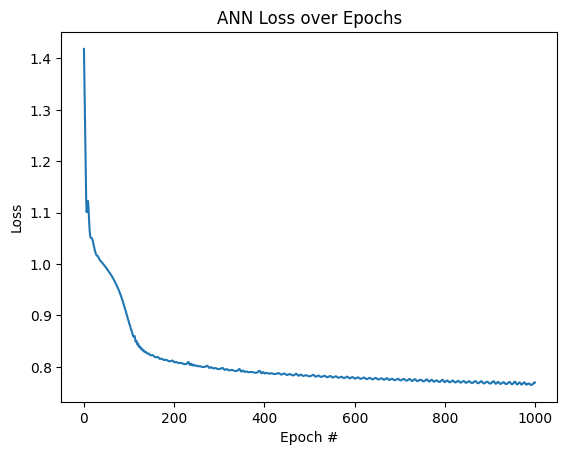

Accuracy: 0.659595102436659
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.29      0.38       356
           1       0.47      0.34      0.40      1007
           2       0.53      0.41      0.46      2339
           3       0.73      0.89      0.80      4547

    accuracy                           0.66      8249
   macro avg       0.56      0.48      0.51      8249
weighted avg       0.63      0.66      0.64      8249



<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted labels')

Text(70.72222222222221, 0.5, 'Actual labels')

Text(0.5, 1.0, 'ANN Confusion Matrix')

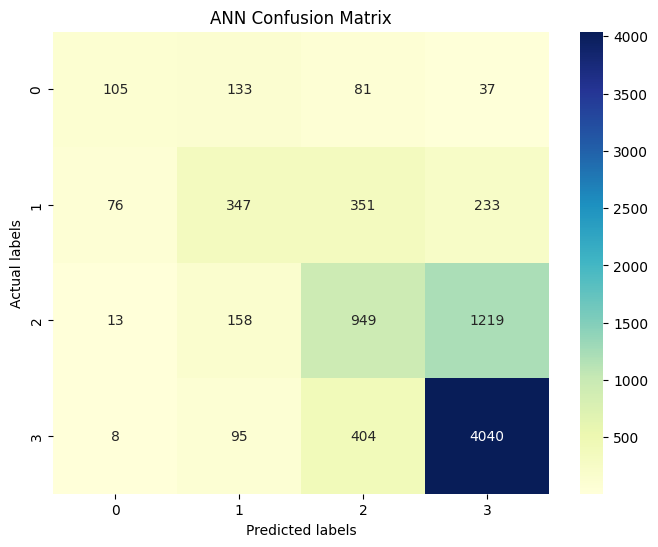

🏃 View run useful-seal-395 at: http://127.0.0.1:5000/#/experiments/975279165383627903/runs/f3a92d2f8d074f55a5d9931f2c0d4889
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/975279165383627903


In [163]:

import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Balanced Dataset? ", ds_Balanced)

mlflow.set_experiment("ANN-capstone")

epochs = 1000
learning_rate = 0.01

# Define the ANN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_tensor.shape[1], 32)  
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(32, 16)
        self.relu2 = nn.ReLU()
        # self.fc3 = nn.Linear(32, 16) 
        self.fc4 = nn.Linear(16, 4)  

    def forward(self, x):
        x = self.relu1(self.fc1(x)) #torch.relu(self.fc1(x))  
        x = self.relu2(self.fc2(x)) #torch.relu(self.fc2(x))  
        # x = torch.relu(self.fc3(x))  
        x = self.fc4(x)
        return x

# Initialize the model, loss function, and optimizer

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

training_losses = []
# test_loss = []
# Train the model
for epoch in range(epochs):  # loop over the dataset multiple times
    # training set
    outputs = model(input_tensor) #model(torch.tensor(X_train.values, dtype=torch.float32))
    loss = criterion(outputs, target_tensor.long())

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    # print loss at each epoch
    if (epoch % 100 == 0):
        print('Batch 100 Epoch {}: Loss = {:.4f}'.format(epoch+1, loss.item()))

# Evaluate the model
model.eval()
y_pred = model(torch.from_numpy(X_test.values).float())
_, predicted = torch.max(y_pred, 1)

accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted, average='macro')
recall = recall_score(y_test, predicted, average='macro')
f1 = f1_score(y_test, predicted, average='macro')

# Plot the loss over epochs
plt.plot(training_losses)
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title('ANN Loss over Epochs')
plt.savefig('ann_loss_plot.png')
plt.show()


# print evaluation metrics
print('Accuracy:', accuracy_score(y_test, predicted))
print('Classification Report:')
print(classification_report(y_test, predicted))
# print('Confusion Matrix:')
# print(confusion_matrix(y_test, predicted))

# CM Evaluation
cm = confusion_matrix(y_test, predicted)
# print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.title("ANN Confusion Matrix")
plt.savefig('ann_cm_plot.png')
plt.show()

with mlflow.start_run():
    mlflow.set_tag("epochs", epochs)
    mlflow.set_tag("dataset", "imbalanced" if not ds_Balanced else 'balanced')
    mlflow.log_metric("learning_rate", learning_rate)
    mlflow.log_params(model.state_dict())
    mlflow.set_tag("model", model.__class__.__name__)
    mlflow.log_metrics({"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "CrossEntropyLoss":  loss.item()})
    mlflow.log_artifact('ann_loss_plot.png')
    mlflow.log_artifact('ann_cm_plot.png')

##### Use performance boosting methods - Future works
- Drop
- Batch Normalization

##### Model Registry